In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import core_modules
import os
from matplotlib import pyplot
import math
import cv2 as cv
print(tf.__version__)

1.15.2


In [43]:
new_model = tf.keras.models.load_model('/home/ec2-user/SageMaker/ECG_Model/out/cnnV3_11_epochs.h5')

new_model.summary()

n, (x_train, y_train), (x_test, y_test) = core_modules.load_data(0.8)
x_test2  =  x_test.reshape((1703,270,556,1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 270, 556, 4)       200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 185, 4)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 179, 16)       3152      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 59, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 53, 32)        25120     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 17, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 15, 64)         1

In [44]:
# summarize filter shapes
for layer in new_model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (7, 7, 1, 4)
conv2d_1 (7, 7, 4, 16)
conv2d_2 (7, 7, 16, 32)
conv2d_3 (3, 3, 32, 64)


In [45]:
filters, biases = new_model.layers[2].get_weights()

In [46]:

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

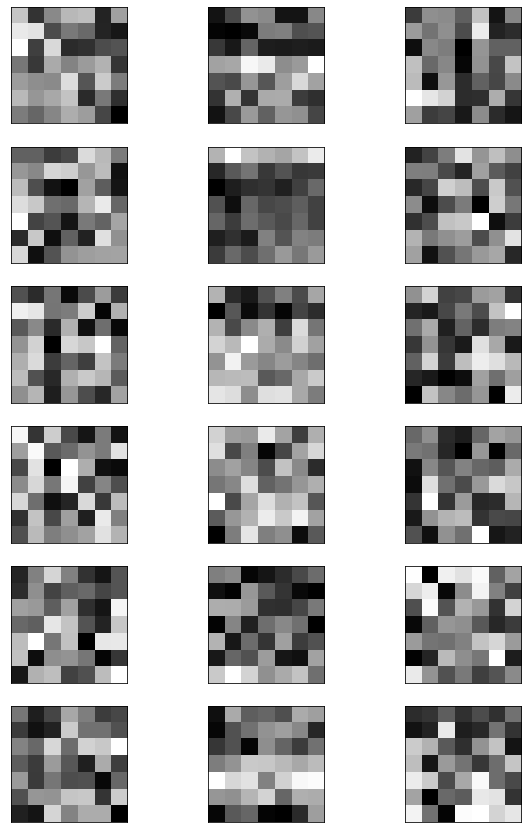

In [47]:
# plot first few filters
fig = plt.figure()
fig.set_size_inches(10,15)
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify sbplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [104]:
Dataset_path = '/home/ec2-user/SageMaker/ECG_analysis/scalogram_plots/'
img = cv.imread(Dataset_path + 'A00001_N.png',0)
s_x = 91;
e_x = 647;
s_y = 44;
e_y = 314;

processed = np.zeros(shape=(556,270))
processed = img[s_y:e_y,s_x:e_x]

    
sample = processed / 255
sample = sample.reshape((1,270,556,1))
#sample = tf.cast(sample, tf.float32)

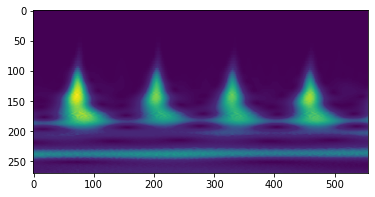

In [105]:
plt.imshow(processed)

In [109]:
from tensorflow.keras.models import Model
model = new_model
# redefine model to output right after the first hidden layer
x = 4
model = Model(inputs=model.inputs, outputs=model.layers[x].output)
                                                                                    
model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 270, 556, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 270, 556, 4)       200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 185, 4)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 179, 16)       3152      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 59, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 53, 32)        25120     
Total params: 28,472
Trainable params: 28,472
Non-trainable params: 0
______________________________________________________

In [110]:
l = new_model.layers[x]
fil, _ = l.get_weights()

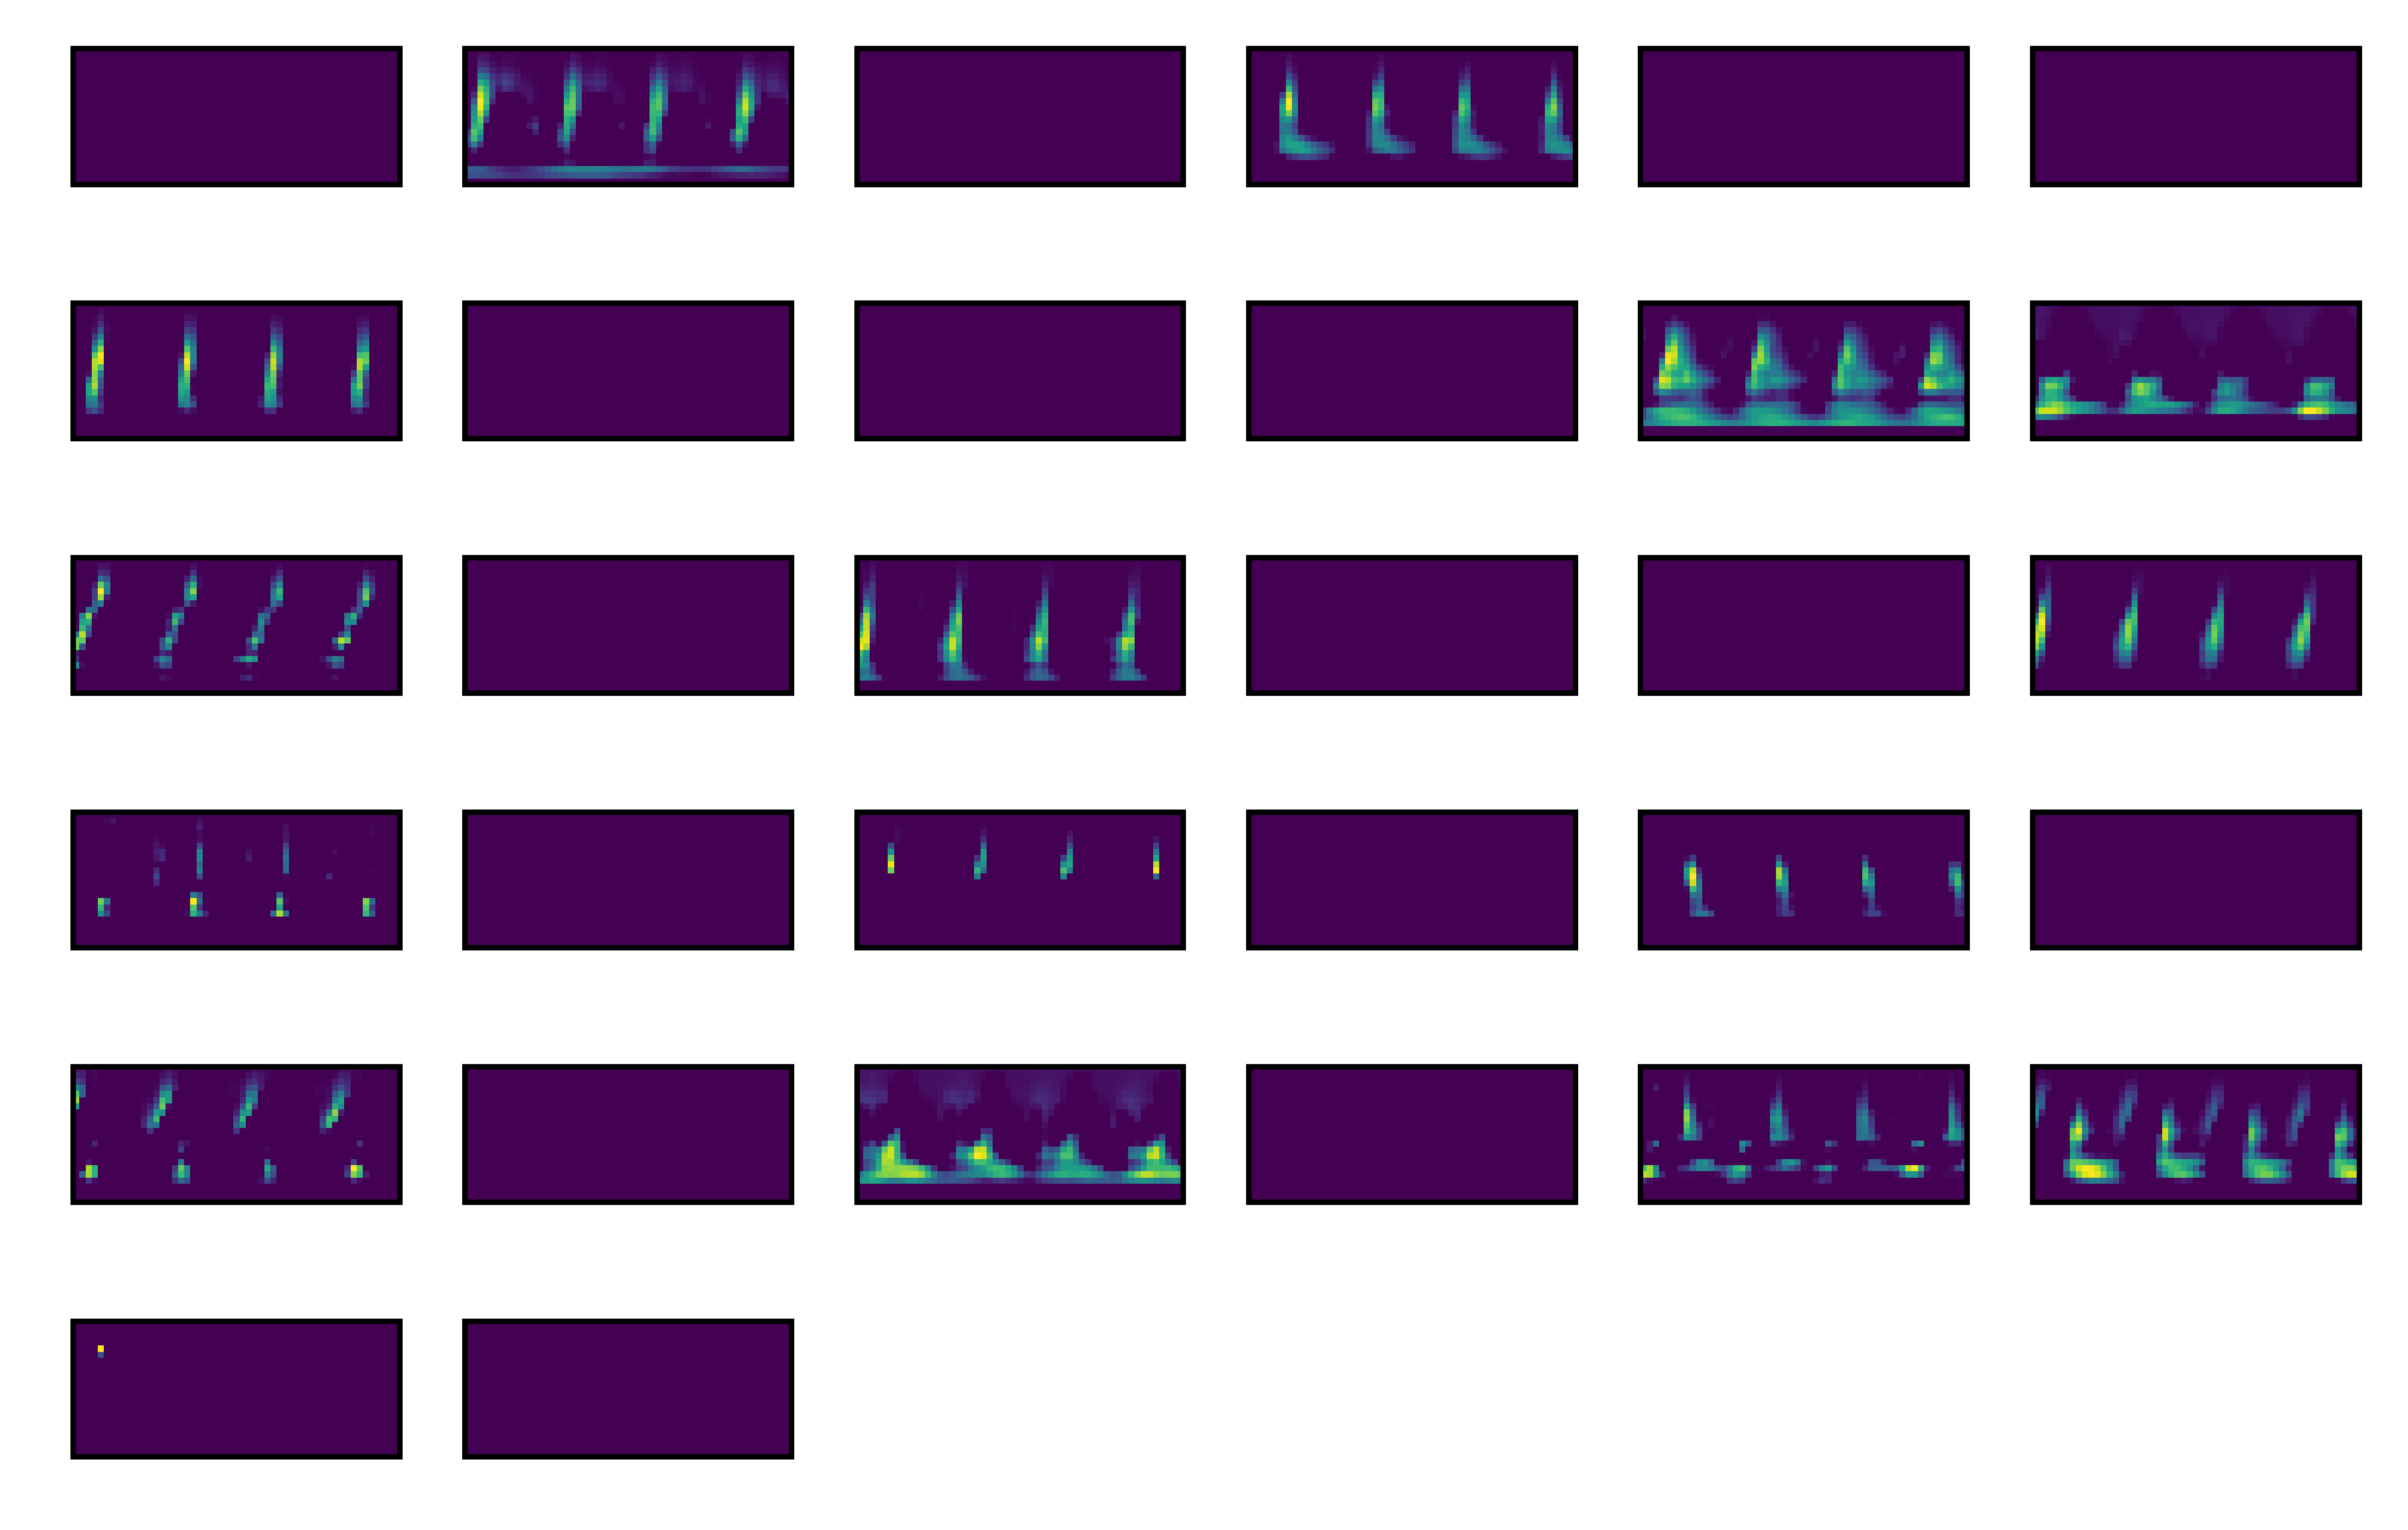

In [111]:
feature_maps = model.predict(sample)

fig = plt.figure()

fig.set_size_inches(6,4)
fig.set_dpi(900)
square = math.ceil(fil.shape[-1]**0.5)
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        if(ix <= fil.shape[-1]):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(feature_maps[0, :, :, ix-1])
            ix += 1
# show the figure
pyplot.show()

In [103]:
fig.savefig('K.png', dpi=200)

In [69]:
from tensorflow.keras.models import Model
model_ = new_model
# redefine model to output right after the first hidden layer
x = 0
model_ = Model(inputs=model_.inputs, outputs=model_.layers[9].output)
                                                       
model_.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 270, 556, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 270, 556, 4)       200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 185, 4)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 179, 16)       3152      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 59, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 53, 32)        25120     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 17, 32)         0  

In [81]:
feature_maps = model_.predict(sample)

In [82]:
feature_maps

array([[ 1.802486 , -0.       , -0.       , -0.       ,  6.089167 ,
        -0.       , -0.       , -0.       , -0.       , -0.       ,
         5.1469264, -0.       , -0.       , -0.       ,  2.9338398,
         4.5701246, -0.       ,  1.409028 ,  1.421999 ,  2.6154506]],
      dtype=float32)

In [83]:
np.max(feature_maps)

6.089167

In [84]:
x = feature_maps.tolist()[0]

In [85]:
np.mean(feature_maps)

1.2994511

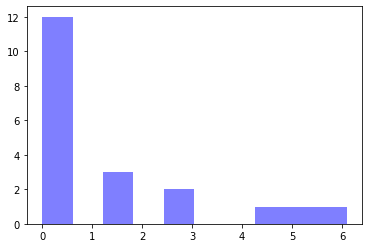

In [86]:
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [87]:
filters, biases = new_model.layers[9].get_weights()

In [88]:
y = filters.tolist()[0]